# Lab | Classification, Handling Imbalanced Data

For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Round 1
- <span class="girk">Import the required libraries and modules that you would ne</span>ed.
- Rea<span class="girk">d that data into Python and call the dataframe `churnData</span>`.
- <span class="girk">Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.</span>
- <span class="girk">Check for null values in the dataframe. Replace the null values.</span>
- <span class="girk">Use the following features:</span> `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - <span class="girk">Split the data into a training set and a test set.</span>
  - <span class="girk">Scale the features either by using normalizer or a standard scaler.</span>
  -<span class="girk">(Optional) Fit a logistic Regression model on the training data</span>.
  - Fit <span class="girk">a Knn Classifier(NOT KnnRegressor please!)model on the training data.</span>
 
 Round 2
  - F<span class="girk">it a Decision Tree Classifier on the training data.
  - C<span class="girk">heck the accuracy on the test data.</span></span>


Round 3

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.
Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

Round 4

- fit a Random forest Classifier on the data and compare the accuracy.
- tune the hyper paramters with gridsearch and check the results.




- regression= average value
- classification take the max value

# Importing libraries

In [38]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from csv import DictReader
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

# ROUND 1

## Loading the dataset

In [2]:
df_churn = pd.read_csv (r"C:\Users\Barbara\OneDrive\Documents\GitHub\IHLabs_BV\Week7\Data_Churn\DATA_Customer-Churn.csv")
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Data Types and convert to numeric

In [3]:
df_churn.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#TotalCharges is object type, converting in numeric
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors="coerce")

In [5]:
#df_churn = pd.get_dummies(df_churn, columns = ["Churn"])

In [6]:

churn_map = {'Yes': 1, 'No': 0}
df_churn['Churn'] = df_churn['Churn'].map(churn_map)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory

### Checking null values in the dataframe. Replace the null values

In [7]:
# if you want to fill NaN in a single column with its mean value
df_churn["TotalCharges"].fillna(df_churn["TotalCharges"].mean(), inplace=True)

### Replacing the null values with the mean

In [8]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

1. Scale the features either by using normalizer or a standard scaler.
2. Split the data into a training set and a test set.
3. (Optional) Fit a logistic Regression model on the training data.
4. Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

<b> Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [9]:
df_churn_new = df_churn.select_dtypes(include=np.number)
df_churn_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [10]:
df_churn_new["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Spliting the data

In [11]:
X=df_churn_new.drop(['Churn'], axis=1)
y=df_churn_new.Churn

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
X_train, X_test, y_train, y_test

(      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
 1479              0      44           49.05   2265.000000
 2377              0      47           55.30   2654.050000
 6613              0       3           20.40     63.150000
 6468              0      14           44.60    641.250000
 2668              0       1           19.75     19.750000
 ...             ...     ...             ...           ...
 5218              0       0           19.70   2283.300441
 4060              0      54           63.35   3409.100000
 1346              0      14           87.25   1258.600000
 3454              1      29           35.65   1025.150000
 3582              0       3           80.50    232.350000
 
 [4930 rows x 4 columns],
       SeniorCitizen  tenure  MonthlyCharges  TotalCharges
 941               0      13           30.15        382.20
 1404              0      35           23.30        797.10
 5515              0      18           19.35        309.25
 3684              0      43

### Scaling the features

In [12]:
#fit is to find the right parameters for the z function (in this case mean and standard deviation)
std_scaler = StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
#transform function compute the result for z function.
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Fit a logistic Regression model on the training data

In [13]:
model_LR=LogisticRegression(random_state=0)   # model
model_LR.fit(X_train_scaled, y_train)   # model train
print(f"{model_LR.__class__.__name__}: Train -> {model_LR.score(X_train_scaled, y_train)}, Test -> {model_LR.score(X_test_scaled, y_test)}") #capting the 80% of variance in the model

LogisticRegression: Train -> 0.7997971602434077, Test -> 0.7733080927591103


## Fit a Knn Classifier model on the training data.

In [14]:
modelKNC = KNeighborsClassifier(n_neighbors=15)
modelKNC.fit(X_train_scaled, y_train)
y_pred=modelKNC.predict(X_test_scaled)
y_pred_train=modelKNC.predict(X_train_scaled)

In [15]:
y_pred_train

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
y_test

941     0
1404    0
5515    0
3684    0
7017    0
       ..
4356    0
5570    0
2125    0
5272    1
5455    0
Name: Churn, Length: 2113, dtype: int64

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.70,0.63
2,Recall,0.53,0.44


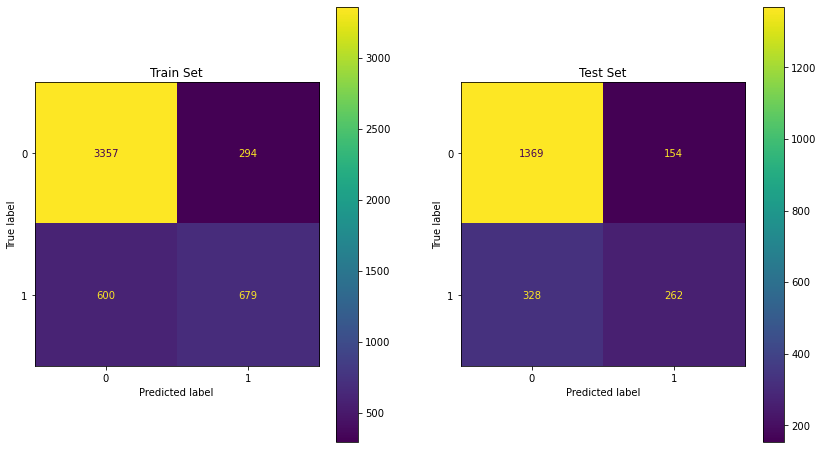

In [18]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(modelKNC,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(modelKNC,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#positive in the diagonal green and yellow
#green 171 : true negative
#purple 19:False negative
#yellow 265:True Positive
# purple 0: False positive

#accurancy = how many records are correctly classified?really good prediction =171 + 265 =436 / ()
#accuracy score=correctly classified divided by the total of records : 436/(436+19=455)

#presicion = percentage of positive cases that my models is able to catch all the cases (people who have cancer = 19 +265=284)
#how the model is able to catch 265 cases, so 93% =(265/284)


# ROUND 2

## Decision Tree Classifier

Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

,Error_metric,Train,Test
0,Accuracy,0.87,0.74
1,Precision,0.79,0.55
2,Recall,0.69,0.43


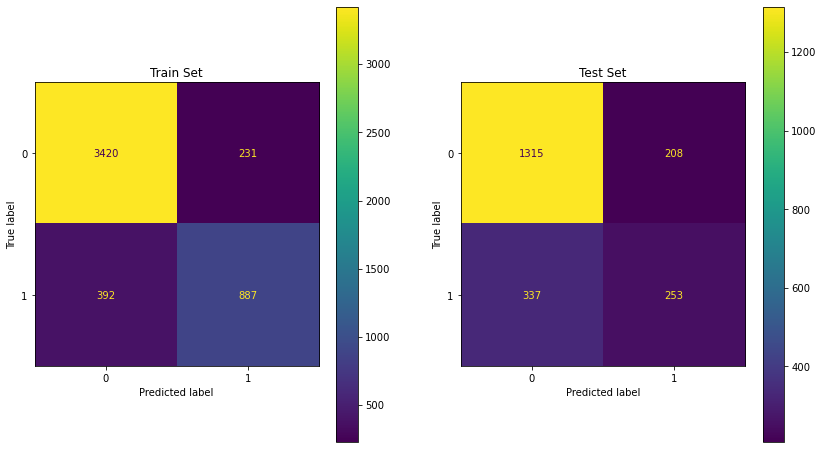

In [19]:
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
modelDTC = DecisionTreeClassifier(max_depth=10) # we need 3 levels because the model could be overfitting (good preformance on the training set, poor generalization to other data/test data) or so complex.
#skearn dont handle categorical variables.

modelDTC.fit(X_train, y_train)

y_pred_train_dt = modelDTC.predict(X_train)
y_pred_test_dt = modelDTC.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))

#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(modelDTC,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(modelDTC,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Feature Importances

<BarContainer object of 4 artists>

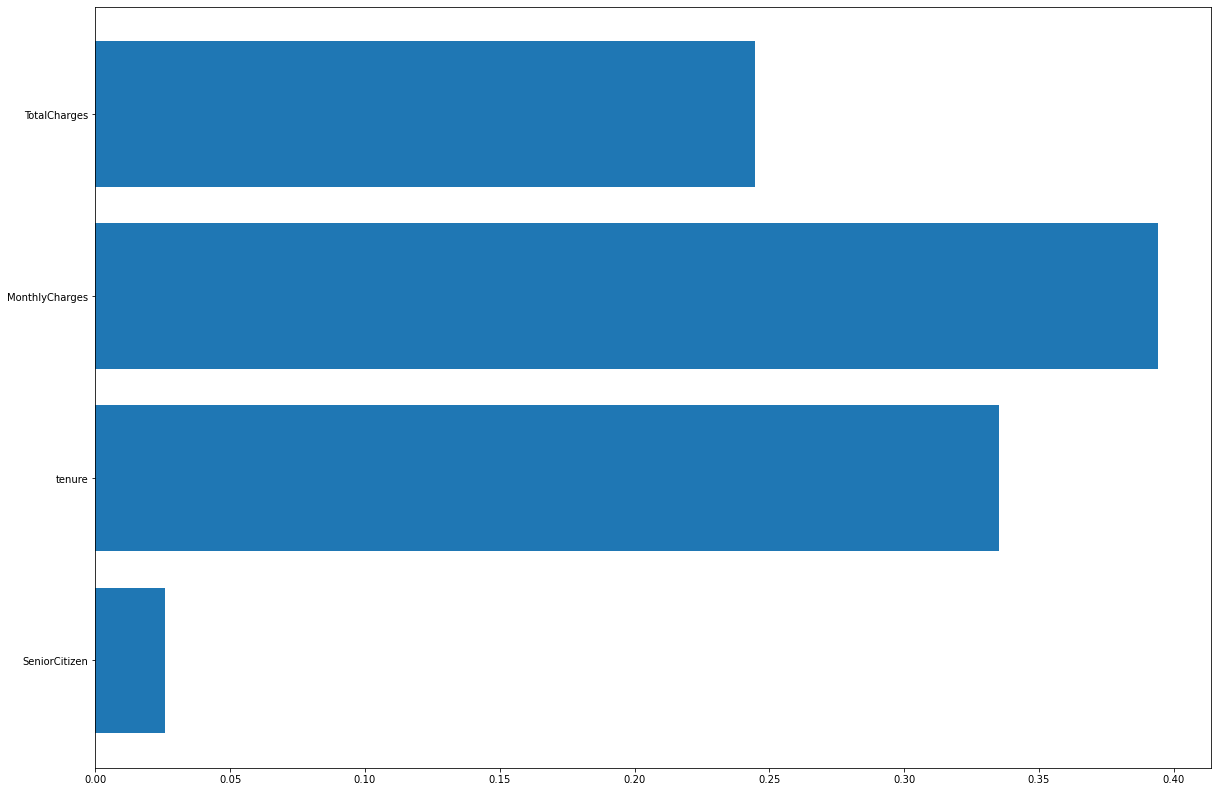

In [20]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,modelDTC.feature_importances_)

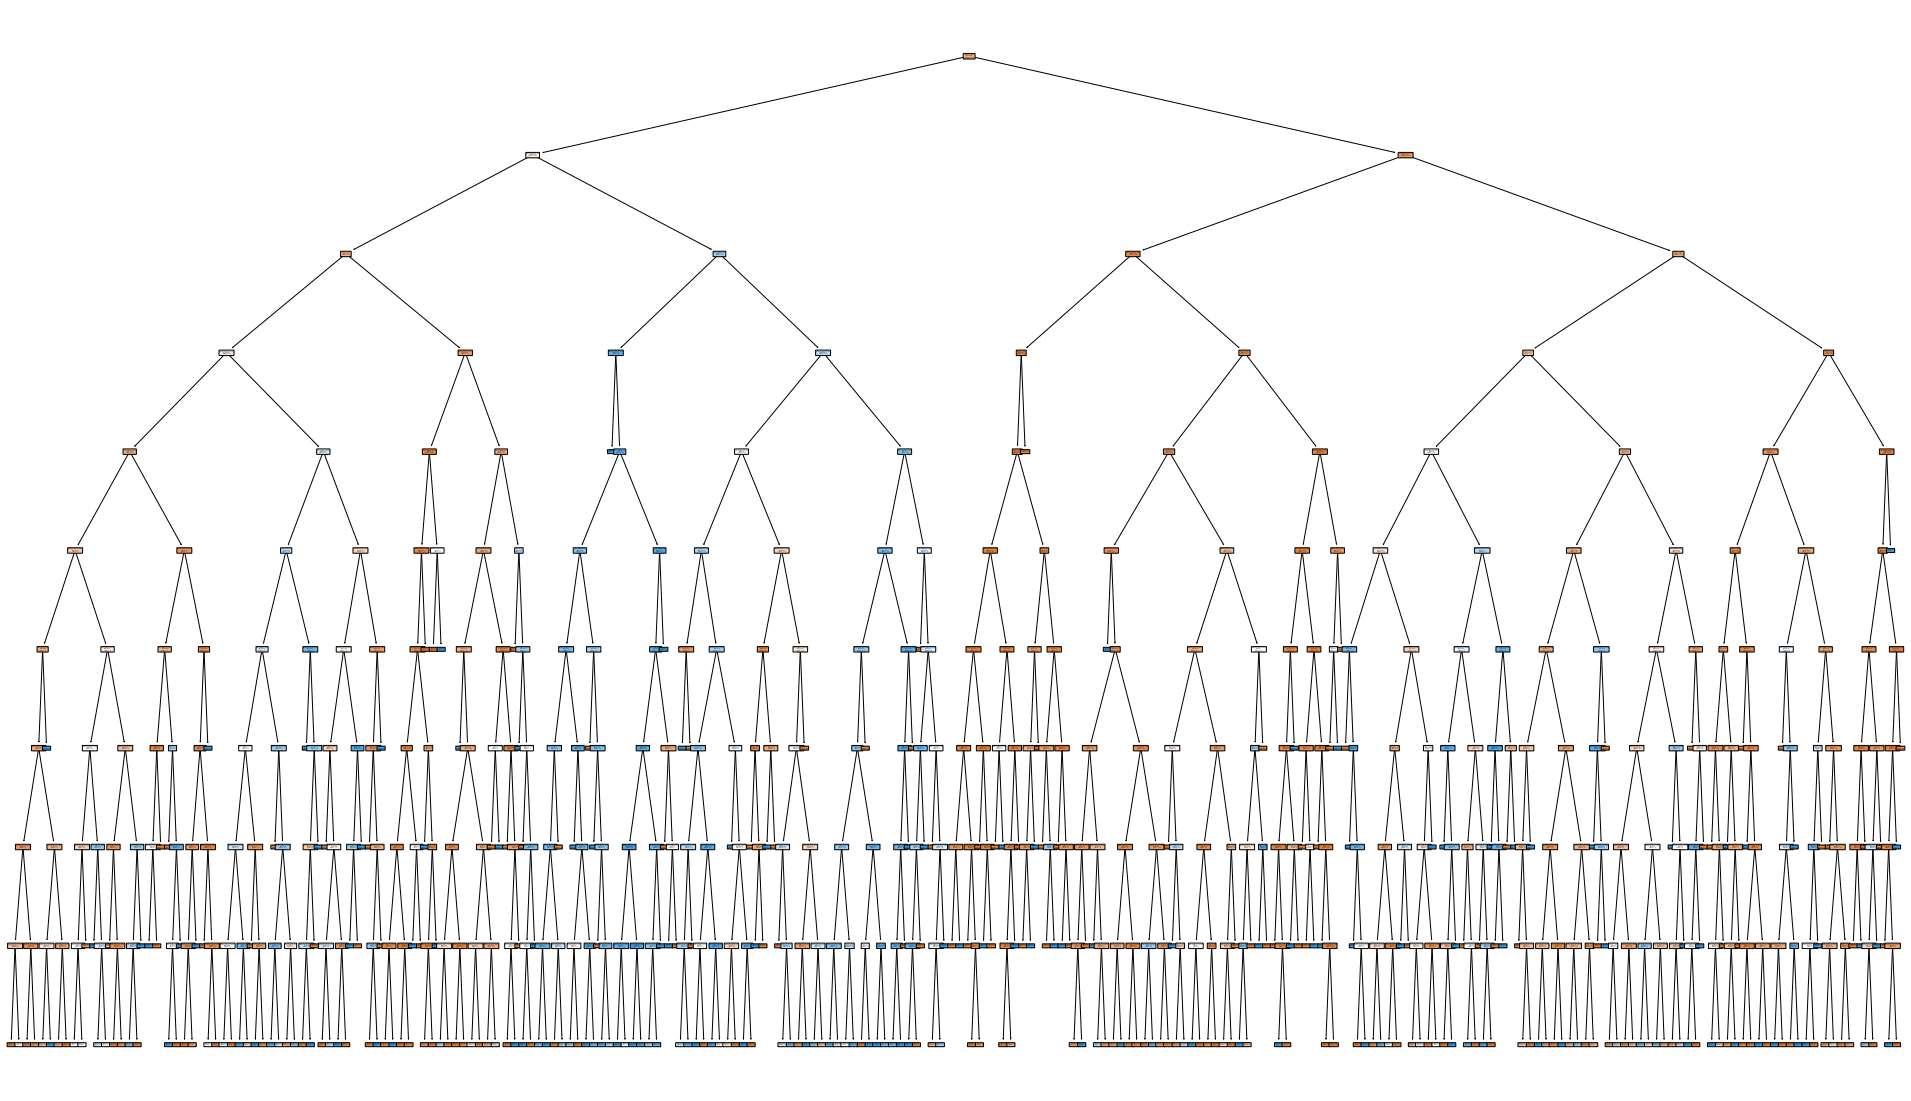

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(modelDTC,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

#if the worst tenureis smaller than 16.5
#and the Monthly  Charges is smaller than 67.5
#and for this group we have a subgroup that the tenure is smaller than 3.5

#leave -> samples= number of records from the training set 398
value = [233 is the negatives cases, and 181 is the number of positives cases ]

#only the people who has churn/leave = gini =0.492, samples=414, value =[233,181]

#COLORS
#Blue marine= positive cases
#orange clair= negative cases
#the pure= darkness
#gini = metric to check the purity, gini = 0 pure, gini= 0.459 impure. probability factor about success or failure


# ROUND 3

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.
Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

## Cross Validation

In [22]:
dict_models = {
    
    "LogR": LogisticRegression(random_state=0),
    "KNeighborsClass":KNeighborsClassifier(n_neighbors=2),
    "DesicionTreeClassifier":DecisionTreeClassifier(max_depth=10)
} 

def cross_val(dict_models, X_train, y_train):
    for model , model_inst in dict_models.items():
        scores = cross_val_score(model_inst, X_train, y_train, cv=5) # cv = number of folds, or K
        print(f"{model_inst.__class__.__name__}: Scores -> {scores} ,ScoresMean -> {scores.mean()},ScoresStd -> {scores.std()}") #capting the 80% of variance in the mod
        

In [23]:
cross_val(dict_models, X_train, y_train)

LogisticRegression: Scores -> [0.79918864 0.80223124 0.78701826 0.79411765 0.80324544] ,ScoresMean -> 0.7971602434077079,ScoresStd -> 0.0059829132672424455
KNeighborsClassifier: Scores -> [0.76267748 0.76876268 0.75557809 0.76369168 0.77079108] ,ScoresMean -> 0.7643002028397566,ScoresStd -> 0.005312698115094863
DecisionTreeClassifier: Scores -> [0.76977688 0.78701826 0.74442191 0.74442191 0.76166329] ,ScoresMean -> 0.7614604462474646,ScoresStd -> 0.016143292292958654


### Checking the imbalance

In [24]:
df_churn_new["Churn"].value_counts()
 # As we can see there is a huge imbalance in the data in the representation
 # of the two categories. Category 0 is represented 5174 times and category 1 is represented 1869 times.

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
5174/len(df_churn_new['Churn'])

0.7346301292063041

## Managing the imbalances

### Resampling Strategies

#### Downsampling

<b>In downsampling, we randomly sample without replacement from the majority class

In [26]:
df_churn_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [27]:
category_0 = df_churn_new[df_churn_new['Churn'] == 0]
category_1 = df_churn_new[df_churn_new['Churn'] == 1]

In [28]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [29]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [30]:
df_down = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data / ssampling with replacement
df_down = df_down.sample(frac=1)
df_down['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

#### Upsampling

In [31]:

df_up = df_churn_new.drop(['Churn'], axis=1)
category_0 = df_churn_new[df_churn_new['Churn'] == 0]
category_1 = df_churn_new[df_churn_new['Churn'] == 1]

In [32]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 5)


In [33]:
df_up = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
df_up = df_up.sample(frac=1)
df_up['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

##### Upsampling using SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [35]:

df_up_2 = df_down.drop(['Churn'], axis=1)
y = df_churn_new['Churn']
X = df_churn_new.drop(['Churn'], axis=1)

In [36]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Round 4

- fit a Random forest Classifier on the data and compare the accuracy.
- tune the hyper paramters with gridsearch and check the results.

### Random Forest Classifier

In [39]:
clf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8150101419878296
0.7704685281590156


In [40]:
from sklearn.model_selection import cross_val_score #cross_val_score is to see the stability of the model
clf = RandomForestClassifier(max_depth=3,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
#oob_score(asking for the score accurancy in the rest of training set, using as a validation set)/ bootstrap: give me the same amount of data and replacement
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.80223124, 0.79716024, 0.78803245, 0.78498986, 0.79107505])

In [41]:
np.std(cross_val_scores) #almost 0 that's giving us a good stability 

0.006238765314089135

### Implementing hyperparameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [43]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [44]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [45]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [46]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.43,0.05,0.03,0.01,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,...,0.77,0.01,12,0.99,0.99,0.99,0.99,0.99,0.99,0.00
1,0.92,0.12,0.05,0.01,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.78,...,0.77,0.01,10,0.99,0.99,0.99,0.99,0.99,0.99,0.00
2,7.12,1.56,0.51,0.06,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.78,...,0.77,0.01,11,0.99,0.99,0.99,0.99,0.99,0.99,0.00
3,0.52,0.11,0.03,0.01,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.78,...,0.78,0.01,9,0.97,0.97,0.97,0.97,0.97,0.97,0.00
4,1.13,0.32,0.08,0.02,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.78,...,0.78,0.01,7,0.97,0.97,0.97,0.97,0.97,0.97,0.00
5,9.80,1.15,0.51,0.12,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.78,...,0.78,0.01,8,0.98,0.98,0.98,0.98,0.98,0.98,0.00
6,0.94,0.18,0.06,0.01,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,...,0.79,0.01,3,0.93,0.93,0.93,0.93,0.93,0.93,0.00
7,1.86,0.30,0.10,0.02,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,...,0.79,0.01,1,0.93,0.94,0.94,0.94,0.94,0.94,0.00
8,5.36,0.68,0.29,0.11,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,...,0.78,0.01,5,0.93,0.93,0.94,0.94,0.93,0.94,0.00
9,0.56,0.20,0.04,0.01,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,...,0.79,0.01,3,0.93,0.93,0.93,0.93,0.93,0.93,0.00


## using the above results 

In [47]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7718052738336714


## Feature Importance

<b> Higher the score, the more important the feature is

In [49]:
clf.fit( X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [50]:
len(X_train.columns)

4

In [51]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [52]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
2,MonthlyCharges,0.38
3,TotalCharges,0.36
1,tenure,0.23
0,SeniorCitizen,0.03


In [53]:
clf.feature_importances_

array([0.02745118, 0.23351824, 0.38264329, 0.35638729])